# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


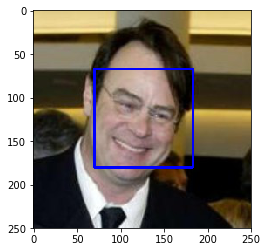

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

# detected human face precentage in human files
percent1 = ([face_detector(x) for x in human_files_short].count(True))/len(human_files_short)*100
print(f"Human face detected in Human Images : {percent1} %")

# detected human face precentage in dog files
percent2 = ([face_detector(x) for x in dog_files_short].count(True))/len(dog_files_short)*100
print(f"Human face detected in Dog Images : {percent2} %")



Human face detected in Human Images : 98.0 %
Human face detected in Dog Images : 17.0 %


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

# We can try this one with the OpenCV LBP Cascade Classifier, but I'll skip it for now.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [5]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:05<00:00, 97353992.21it/s] 


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [6]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    # Import image from img_path in PIL format
    img = Image.open(img_path)
    
    # Define normalization step for image
    normalize = transforms.Normalize(mean=(0.485, 0.456, 0.406),
                                     std=(0.229, 0.224, 0.225))
    
    # Define transformations of image
    preprocess = transforms.Compose([transforms.Resize(256),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     normalize])
    
    # Preprocess image to 4D Tensor (.unsqueeze(0) adds a dimension)
    img_tensor = preprocess(img).unsqueeze_(0)
    
    # Move tensor to GPU if available
    if use_cuda:
        img_tensor = img_tensor.cuda()
        
    # Turn on evaluation mode when not training the model
    VGG16.eval()
    
    # Get predicted category for image
    with torch.no_grad():
        output = VGG16(img_tensor)
        prediction = torch.argmax(output).item()
    
    return prediction # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [7]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    prediction = VGG16_predict(img_path)
    return ((prediction >= 151) & (prediction <=268))

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

0% of humans are detected as dog, and 100% of dogs are detected as dogs. When I test with own images from my computer, some human faces are not recognized as human, while some dog faces are recognized as human, so I am confused by these accuracy numbers. I am looking forward the reviewer's comments.

In [8]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

# Human detected as Dog percentage : 
percent1 = ([dog_detector(x) for x in human_files_short].count(True))/len(human_files_short)*100
print(f"Human detected as Dog : {percent1} %")

# Dog detected as Dog percentage
percent2 = ([dog_detector(x) for x in dog_files_short].count(True))/len(dog_files_short)*100
print(f"Dog detected as Dog : {percent2} %")


Human detected as Dog : 0.0 %
Dog detected as Dog : 100.0 %


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [10]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

#Other models can be tested here for performance, but because the vGG-16 reported flawless performance, we skipped this part.
# The 100% accuracy on the dog detected as dog precentage migth be too good to be true. I might need to double-check this code.

# When i tried with self-supplied images, i noticed some false positives, so the flawless precentages are misleading.
# Thus, to improve this portion of the model with new architectures makes sense.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [11]:
import os
from torchvision import datasets, transforms

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

data_dir = '/data/dog_images'

train_transforms = transforms.Compose([transforms.Resize(size=258),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.RandomRotation(10),
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

validTest_transforms = transforms.Compose([transforms.Resize(size=258),
                                           transforms.CenterCrop(224),
                                           transforms.ToTensor(),
                                           transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

train_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'), transform=train_transforms)
valid_dataset = datasets.ImageFolder(os.path.join(data_dir, 'valid'), transform=validTest_transforms)
test_dataset = datasets.ImageFolder(os.path.join(data_dir, 'test'), transform=validTest_transforms)

trainLoader = torch.utils.data.DataLoader(train_dataset,
                                          batch_size=32,
                                          shuffle=True,
                                          num_workers=0)

validLoader = torch.utils.data.DataLoader(valid_dataset,
                                          batch_size=32,
                                          shuffle=True,
                                          num_workers=0)

testLoader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=32,
                                          shuffle=False,
                                          num_workers=0)




**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: The images were resized, horizontally randomly flipped, randomly rotated, center cropped, tranformed to a tensor, and then normalized. The tensor size is 224x224x3 for each image, then in a training batch we have a tensor of batch_sizex224x224x3. Because we are using a pre-trained model and require certain input dimensions, I used the tensor as 224x224x3.

We augmented the data set to increase data variety.

When i tested with self-supplied images, a 45 degree tilted human face was not recognized as a human, thus I feel that we can augment the data further to increase accuracy.



### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [16]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(256*7*7, 512)
        self.fc2 = nn.Linear(512, 133)
        self.dropout = nn.Dropout(0.5)
    
    def forward(self, x):
        ## Define forward behavior
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.pool(F.relu(self.conv5(x)))
        x = x.view(-1, 256*7*7)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.

__Answer:__ Based on the VGG-16 paper by Simonyan and Zisserman, I decided to use the simplest architecture first. (table1, columnA)

The fully connected layers (FC1-2) are chosen such that they lead to the 133 classification of dog breeds in 2 steps possible. When I finished the AI ND with Python, we wrote the flower classifier where the FC layers were similar for the 3 steps. I tried to start with more layers, but training was too slow, so I decided to start with the least FC layers possible.

Based on lecture videos, it is quite standard to pick the pooling to reduce image size by 2, thus it was chosen with kernel size 2 and stride 2.

If the kernel size is chosen as 3 in the CNN layers, then the padding should be 1. After 5 convolutions, the feature map reduces from 224x224 to 7x7

Dropout is added as 0.5 as standard, but I tried with 0.25 to increase accuracy of the model, but then also changed it back to 0.5 to speed up training.

The final FC layer does not use softmax at this point, because criterion is set as CrossEntropyLoss.

I played with the architecture a few times to speed up the training process and also investigated github repos of others from previous years with Keras implementation (non Pytorch) to see how the architected their model.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [17]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [18]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [19]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
        
            # clear gradients of all optimized variables
            optimizer.zero_grad()

            # forwarward pass
            output = model(data)
            # calculate batch loss
            loss = criterion(output, target)
            # backward pass
            loss.backward()
            # perform optimization step
            optimizer.step()
            # update training loss
            train_loss += ((1 / (batch_idx + 1)) * (loss.data - train_loss))
        
        
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            # forward pass: compute predicted outputs by passing inputs to the model
            with torch.no_grad():
                output = model(data)
            loss = criterion(output, target)
            valid_loss += ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}). Saving model...'.format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model

# define loaders_scratch
loaders_scratch = {'train': trainLoader,
                   'valid': validLoader,
                   'test': testLoader}

# train the model
model_scratch = train(25, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.885641 	Validation Loss: 4.877297
Validation loss decreased (inf --> 4.877297). Saving model...
Epoch: 2 	Training Loss: 4.831307 	Validation Loss: 4.705243
Validation loss decreased (4.877297 --> 4.705243). Saving model...
Epoch: 3 	Training Loss: 4.611864 	Validation Loss: 4.568481
Validation loss decreased (4.705243 --> 4.568481). Saving model...
Epoch: 4 	Training Loss: 4.456695 	Validation Loss: 4.398710
Validation loss decreased (4.568481 --> 4.398710). Saving model...
Epoch: 5 	Training Loss: 4.347446 	Validation Loss: 4.300402
Validation loss decreased (4.398710 --> 4.300402). Saving model...
Epoch: 6 	Training Loss: 4.218283 	Validation Loss: 4.225093
Validation loss decreased (4.300402 --> 4.225093). Saving model...
Epoch: 7 	Training Loss: 4.073079 	Validation Loss: 4.176081
Validation loss decreased (4.225093 --> 4.176081). Saving model...
Epoch: 8 	Training Loss: 3.934489 	Validation Loss: 4.080997
Validation loss decreased (4.176081 --> 4.080997

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [20]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.729650


Test Accuracy: 13% (115/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [21]:
## TODO: Specify data loaders

data_dir = '/data/dog_images'

train_transforms = transforms.Compose([transforms.Resize(size=258),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.RandomRotation(10),
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

validTest_transforms = transforms.Compose([transforms.Resize(size=258),
                                           transforms.CenterCrop(224),
                                           transforms.ToTensor(),
                                           transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

train_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'), transform=train_transforms)
valid_dataset = datasets.ImageFolder(os.path.join(data_dir, 'valid'), transform=validTest_transforms)
test_dataset = datasets.ImageFolder(os.path.join(data_dir, 'test'), transform=validTest_transforms)

trainLoader = torch.utils.data.DataLoader(train_dataset,
                                          batch_size=32,
                                          shuffle=True,
                                          num_workers=0)

validLoader = torch.utils.data.DataLoader(valid_dataset,
                                          batch_size=32,
                                          shuffle=True,
                                          num_workers=0)

testLoader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=32,
                                          shuffle=False,
                                          num_workers=0)





### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [37]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
# check if CUDA is available
use_cuda = torch.cuda.is_available()

# download VGG16 pretrained model
model_transfer = models.vgg16(pretrained=True)

# Freeze parameters of the model to avoid brackpropagation
for param in model_transfer.parameters():
    param.requires_grad = False

# get the number of dog classes from the train_dataset
number_of_dog_classes = len(train_dataset.classes)
    
# Define dog breed classifier part of model_transfer
classifier = nn.Sequential(nn.Linear(25088, 1024),
                           nn.ReLU(),
                           nn.Dropout(0.5),
                           # nn.Linear(4096, 512),
                           # nn.ReLU(),
                           # nn.Dropout(0.5),
                           # previously with 3 layers of classifier, training was too slow, so I reduced to 2 layers
                           nn.Linear(1024, number_of_dog_classes))

# Rplace the original classifier with the dog breed classifier from above
model_transfer.classifier = classifier

if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

The VGG-16 is one of the best image recognition models out there. Transfering this model, the classifier part needs to be updated to recognize dog breeds. Initially, the classifier was created using 3 fully connected layers and with 2 dropout layers. 25088->4096->512->133. The training was too slow and even after 20 epochs, i could not see significant boost in output. Thus, I further simplified the classifier to 2 layers. 25088->1024->133.. This time, the model training speed increased significantly. Although the original VGG paper suggests multiple layers as the most basic classifier, i think having only 2 layers at the classifier on the transfer learning works just as fine and speeds up the training. If the performance is not satisfactory, then a more complex model can be tried.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [38]:
criterion_transfer = nn.CrossEntropyLoss()

# watch out and train only the classifier, not the entire model
optimizer_transfer = optim.Adam(model_transfer.classifier.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [39]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [42]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):

    valid_loss_min = np.Inf
    
    print(f"Batch Size: {loaders['train'].batch_size}\n")
    
    for epoch in range(1, n_epochs+1):
        train_loss = 0.0
        valid_loss = 0.0
        
        # train the model
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss += ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            if (batch_idx + 1) % 50 == 0:
                print(f'Epoch:{epoch}/{n_epochs} \tBatch:{batch_idx + 1}')
                print(f'Train Loss: {train_loss}\n')

        # validate the model
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            with torch.no_grad():
                output = model(data)
            loss = criterion(output, target)
            valid_loss += ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
           
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        # save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}). Saving model...'.format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model


# define loaders_transfer
loaders_transfer = {'train': trainLoader,
                    'valid': validLoader,
                    'test': testLoader}

# train the model
n_epochs = 10
model_transfer.cuda()
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

















Batch Size: 32

Epoch:1/10 	Batch:50
Train Loss: 1.3626322746276855

Epoch:1/10 	Batch:100
Train Loss: 1.4154409170150757

Epoch:1/10 	Batch:150
Train Loss: 1.4794843196868896

Epoch:1/10 	Batch:200
Train Loss: 1.4699106216430664

Epoch: 1 	Training Loss: 1.470999 	Validation Loss: 1.051068
Validation loss decreased (inf --> 1.051068). Saving model...
Epoch:2/10 	Batch:50
Train Loss: 1.3904025554656982

Epoch:2/10 	Batch:100
Train Loss: 1.362321138381958

Epoch:2/10 	Batch:150
Train Loss: 1.3788996934890747

Epoch:2/10 	Batch:200
Train Loss: 1.4028805494308472

Epoch: 2 	Training Loss: 1.399611 	Validation Loss: 1.101727
Epoch:3/10 	Batch:50
Train Loss: 1.2887498140335083

Epoch:3/10 	Batch:100
Train Loss: 1.295055866241455

Epoch:3/10 	Batch:150
Train Loss: 1.3551982641220093

Epoch:3/10 	Batch:200
Train Loss: 1.3539385795593262

Epoch: 3 	Training Loss: 1.347410 	Validation Loss: 1.073518
Epoch:4/10 	Batch:50
Train Loss: 1.1404993534088135

Epoch:4/10 	Batch:100
Train Loss: 1.2281150

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [43]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.025987


Test Accuracy: 72% (609/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [44]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_dataset.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    img = Image.open(img_path)
    # Define normalization step for image
    normalize = transforms.Normalize(mean=(0.485, 0.456, 0.406),
                                     std=(0.229, 0.224, 0.225))
    # Define transformations of image
    preprocess = transforms.Compose([transforms.Resize(258),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     normalize])
    # Preprocess image to 4D Tensor (.unsqueeze(0) adds a dimension)
    img_tensor = preprocess(img).unsqueeze_(0)
    # Move tensor to GPU if available
    if use_cuda:
        img_tensor = img_tensor.cuda()
    ## Inference
    # Turn on evaluation mode
    model_transfer.eval()
     # Get predicted category for image
    with torch.no_grad():
        output = model_transfer(img_tensor)
        prediction = torch.argmax(output).item()
    # Turn off evaluation mode
    model_transfer.train()
    
    # Use prediction to get dog breed
    breed = class_names[prediction]
    
    return breed

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [45]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    if dog_detector(img_path):
        plt.imshow(Image.open(img_path))
        plt.show()
        print(f'This dog breed looks like a {predict_breed_transfer(img_path)}')
        print('\n-----------------------------------\n')
    elif face_detector(img_path):
        print('Hello, you look like a human.')
        plt.imshow(Image.open(img_path))
        plt.show()
        print(f'You resemble a {predict_breed_transfer(img_path)}')
        print('\n-----------------------------\n')
    else:
        plt.imshow(Image.open(img_path))
        plt.show()
        print('Sorry, I did not detect a human or a dog in this image.')
        print('\n-----------------------------------\n')

    


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ So I have tested using self-supplied images and I see that the tilted female head is not recognized as human. Thus, we could have trained the model with more augmented data, in particular we could augment our data with a rotation of at least 45 degrees, instead of 10. Secondly, we could make our classifier more complex (change topology) and let the model run for longer periods of time. Thirdly, we could use a better face or dog detectors. Finally, we could use a batch normalizer to normalize our batches. According to this article, https://machinelearningmastery.com/improve-deep-learning-performance/ , one final type of performance improvement could come from using ensemble methods.

Hello, you look like a human.


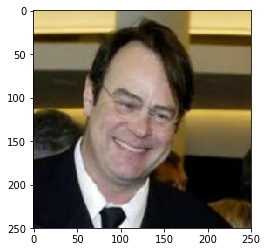

You resemble a Chihuahua

-----------------------------

Hello, you look like a human.


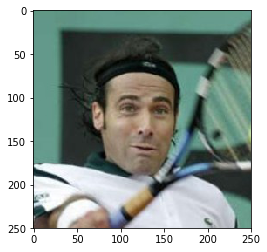

You resemble a Chinese crested

-----------------------------

Hello, you look like a human.


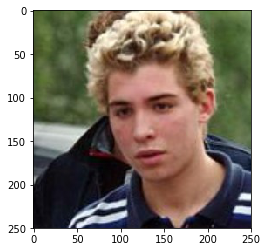

You resemble a Dachshund

-----------------------------



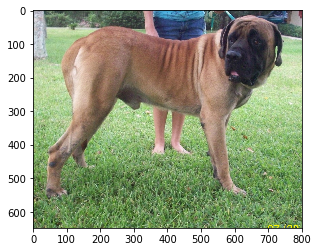

This dog breed looks like a Bullmastiff

-----------------------------------



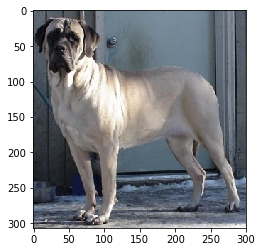

This dog breed looks like a Mastiff

-----------------------------------



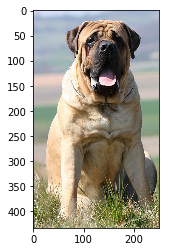

This dog breed looks like a Mastiff

-----------------------------------



In [46]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)

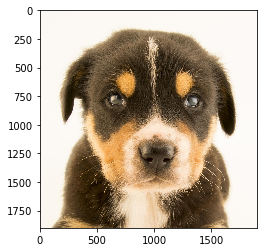

This dog breed looks like a Entlebucher mountain dog

-----------------------------------



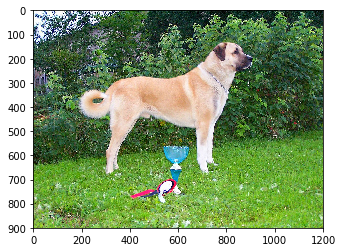

This dog breed looks like a Akita

-----------------------------------

Hello, you look like a human.


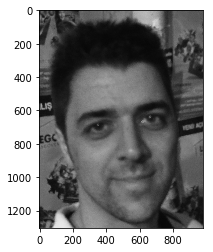

You resemble a American staffordshire terrier

-----------------------------



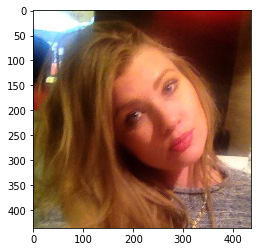

Sorry, I did not detect a human or a dog in this image.

-----------------------------------



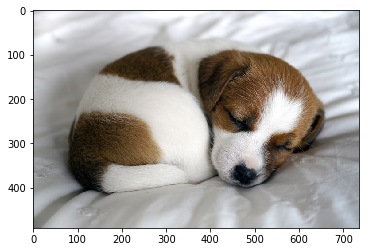

This dog breed looks like a Cardigan welsh corgi

-----------------------------------

Hello, you look like a human.


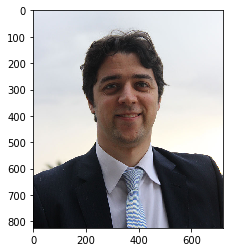

You resemble a Xoloitzcuintli

-----------------------------



In [47]:
import numpy as np
from glob import glob

# load filenames
files = np.array(glob("my_images/*"))
for file_path in files:
    run_app(file_path)

In [49]:
# The accuracy on the model with VGG16 tranfer learning was 30% until I simplified the classifer further and reduced training time. 
# When I uploaded 6 images from my computer, these were not perfectly well classified. The face detector has issues detecting
# a tilted human face, thus the data could have been augmented better with even more tilted images.

# I am happy that by simplifying the classifier and reducing 1 layer, the training speed up and both training loss and validation
#loss went down quickly.

# probably, if i waiting further epochs  with the more complex model, i would have reached the same results as reviewer suggested
# But i think we should start with the most basic model first and then increase complexity if higher accuracy is required.

# finally, the test images i uploaded also have some misleading classification, such as the Anatolian Kangal dog classified as Akita.
# so the 72% accuracy on test data can be further improved.



In [50]:
# I have used the Udacity chat to ask questions and copied over some code parts. I also used Github profiles and compared different implementations of dogbreed classifiers, but I have coded my own and things were not working as good as they should be. I have improved the model by simplifying and running quicker training.